# Exercise 6

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt


<IPython.core.display.Javascript object>


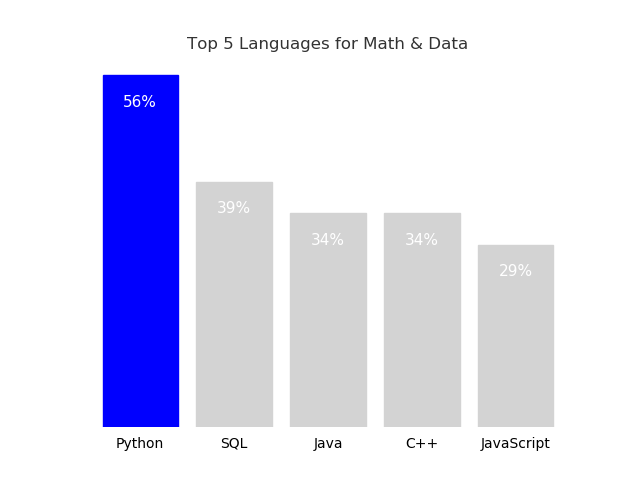

Text(0.5, 1.0, 'Top 5 Languages for Math & Data')

In [74]:
import numpy as np
plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]
plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data', alpha=0.8)

In [75]:
# 1st 

# 팁과 라벨 지우기
plt.tick_params(top = False, bottom = False, left =False, right = False, labelleft= False, labelbottom = True)
plt.ylabel('')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [76]:
# 2nd
# set color
bars = plt.gca().patches
for bar in bars:
    bar.set_color('lightgrey')
bars[0].set_color('blue')

In [77]:
# 3rd
for bar in bars:
    plt.gca().text(bar.get_x()+bar.get_width()/2, bar.get_height()-5,
                 str(int(bar.get_height()))+'%', ha = 'center', color ='w',fontsize = 11)

# Data Acquisition: From File system

In [17]:
import pandas as pd
# 파일이 너무 많아 주석처리 하겠습니다
# !dir

In [18]:
# 데이터 간략 확인
!type ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [19]:
# csv 자체가 , 구분자로 구분하기 때문에 자동 구분
df = pd.read_csv('ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [20]:
df = df.set_index('message')
df

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [21]:
# 테이블 데이터를 읽어온다. 첫번째만 헤더가 되고 나머지는 쭉 읽어온다,
dft = pd.read_table('ex1.csv')
dft

,"a,b,c,d,message"
0,"1,2,3,4,hello"
1,"5,6,7,8,world"
2,"9,10,11,12,foo"


In [22]:
# 구분자(',')를 이용하여 구분가능하다
dft = pd.read_table('ex1.csv',sep = ',')
dft

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [23]:
# 두번째 파일
!type ex2.csv

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [24]:
df2 = pd.read_csv('ex2.csv')
df2

,1,2,3,4,hello
0,5,6,7,8,world
1,9,10,11,12,foo


In [25]:
# 헤더를 없애다
df2 = pd.read_csv('ex2.csv', header=None)
df2

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [26]:
df2 = pd.read_csv('ex2.csv',names = ['a','b','c','d','message'])
df2

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [27]:
# name과 index 설정
name = ['a','b','c','d','message']
df2 = pd.read_csv('ex2.csv',names = name, index_col = 'message')
df2

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [28]:
# 세번째 파일
!type ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [29]:
#원하지 않은 row 지우기
df4 = pd.read_csv('ex4.csv',skiprows=[0,2,3])
df4

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [30]:
!type ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo


In [31]:
# 널 값이 있는 상태
df5 = pd.read_csv('ex5.csv')
df5

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [32]:
# 어디가 null 인지 확인
pd.isnull(df5)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [33]:
# 필요없는 요소들을 지정하여 없앨 수 있다
sentinels = {'something':['two'],'message':['world','NA']}
df5 = pd.read_csv('ex5.csv', na_values = sentinels)
df5

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,NaN
2,three,9,10,11.0,12,foo


# Writing Data to Text format

In [34]:
df5

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,NaN
2,three,9,10,11.0,12,foo


In [35]:
# 파일을 직접 써보기
df5.to_csv('out.csv')

In [36]:
!type out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,,5,6,,8,
2,three,9,10,11.0,12,foo


In [37]:
# Null은 NULL그 자체로 표현한다(원래는 칸이 비워져있다)
df5.to_csv('out.csv',na_rep = 'NULL')
!type out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,NULL,5,6,NULL,8,NULL
2,three,9,10,11.0,12,foo


In [38]:
# index와 header를 빼고 순수값만 저장한다
df5.to_csv('out.csv', index = False, header = False)
!type out.csv

one,1,2,3.0,4,
,5,6,,8,
three,9,10,11.0,12,foo


In [39]:
# 구분자를 바꿔준다
df5.to_csv('out.csv', sep = '&')
!type out.csv

&something&a&b&c&d&message
0&one&1&2&3.0&4&
1&&5&6&&8&
2&three&9&10&11.0&12&foo


# Data Acquisition from JSON Data

In [40]:
# JSON 데이터를 사용한다
obj = """
{"name" : "Wes",
"places_lived":["United States","Spain","Germany"],
"pet":null,
"siblings": [{"name":"Scott","age":30,"pets": ["Zeus","Zuko"]},
            {"name":"Katie","age":38,"pets": ["Sixes","Stache","Cisco"]}]
}
"""
obj

'\n{"name" : "Wes",\n"places_lived":["United States","Spain","Germany"],\n"pet":null,\n"siblings": [{"name":"Scott","age":30,"pets": ["Zeus","Zuko"]},\n            {"name":"Katie","age":38,"pets": ["Sixes","Stache","Cisco"]}]\n}\n'

In [41]:
import json

In [42]:
json.loads(obj)

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [43]:
# 타입은 딕셔너리
result = json.loads(obj)
type(result)

dict

In [44]:
df6 = pd.DataFrame(result['places_lived'], columns=['place'])
df6

,place
0,United States
1,Spain
2,Germany


In [46]:
# json 일부 파싱
df7 = pd.DataFrame(result['siblings'],columns = ['name','age','pets'])
df7

,name,age,pets
0,Scott,30,"[Zeus, Zuko]"
1,Katie,38,"[Sixes, Stache, Cisco]"


# Getting Data using API

In [53]:
#공공데이터 읽어오기
import urllib.request
url = "http://apis.data.go.kr/B553077/api/open/sdsc/storeZoneOne?ServiceKey=PLo6jiIN0HeZlR%2F6VMg54t7W9zrN9GtRRXySPLeOzjCi5B7ukNvc9IS%2FdpASIXhd8ZHXkYTMMntVEUDqMgdWXg%3D%3D&type=json"

response = urllib.request.urlopen(url)
json_str = response.read().decode('utf-8')


In [82]:
# pdf 변환시 자료가 너무 많이 떠 주석처리하겠습니다
# json_str

In [84]:
# pdf 변환시 자료가 너무 많이 떠 주석처리하겠습니다
json_object = json.loads(json_str)
# json_object

In [83]:
# pdf 변환시 자료가 너무 많이 떠 주석처리하겠습니다
body = [json_object['body']['items']]
#body

In [58]:
from pandas.io.json import json_normalize
json_normalize(json_object['body']['items'])

C:\Users\SUNGYONG\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,trarNo,mainTrarNm,ctprvnCd,ctprvnNm,signguCd,signguNm,trarArea,coordNum,coords,stdrDt
0,670,울산시외버스터미널,31,울산광역시,31140,남구,85752.0,13,"POLYGON ((129.340312 35.535978, 129.339978 35....",2015-12-17
1,1241,충남 보령시 대천2동_1,44,충청남도,44180,보령시,175372.3,76,"POLYGON ((126.593564 36.352813, 126.593758 36....",2015-12-17
2,1882,역삼역_1,11,서울특별시,11680,강남구,103121.4,33,"POLYGON ((127.039452 37.495138, 127.039172 37....",2015-12-17
3,1881,교대역_2,11,서울특별시,11650,서초구,80645.6,35,"POLYGON ((127.019295 37.494801, 127.01909 37.4...",2015-12-17
4,1880,서울 송파구 가락시장역,11,서울특별시,11710,송파구,50384.0,13,"POLYGON ((127.119288 37.494957, 127.1187 37.49...",2015-12-17
...,...,...,...,...,...,...,...,...,...,...
1154,1563,수원지방법원안산지원앞_6,41,경기도,41273,안산시 단원구,64549.0,5,"POLYGON ((126.830176 37.315118, 126.827595 37....",2015-12-17
1155,1562,수원지방법원안산지원앞_5,41,경기도,41273,안산시 단원구,64832.1,6,"POLYGON ((126.832937 37.314233, 126.832999 37....",2015-12-17
1156,1678,경기 성남시 야탑역_2,41,경기도,41135,성남시 분당구,103368.0,19,"POLYGON ((127.131602 37.411645, 127.131617 37....",2015-12-17
1157,1677,인천 연수구 동춘2동_1,28,인천광역시,28185,연수구,32847.9,29,"POLYGON ((126.671552 37.408432, 126.67078 37.4...",2015-12-17


In [64]:
# pandas_datareader 라이브러리
import pandas_datareader as pdr


In [65]:
# 삼성전자 코드를 이용하여 주가 확인
df = pdr.get_data_yahoo('005930.KS')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-05-02,25240.0,24900.0,24940.0,25000.0,7027600.0,21641.761719
2016-05-03,25400.0,25120.0,25340.0,25220.0,7903300.0,21832.212891
2016-05-04,25800.0,25240.0,25440.0,25800.0,14702750.0,22334.296875
2016-05-09,26000.0,25700.0,25800.0,25980.0,13718100.0,22490.121094
2016-05-10,26000.0,25760.0,25980.0,25920.0,8559550.0,22438.179688
...,...,...,...,...,...,...
2021-04-26,83500.0,82600.0,82900.0,83500.0,15489938.0,83500.000000
2021-04-27,83300.0,82500.0,83200.0,82900.0,12941533.0,82900.000000
2021-04-28,83200.0,82100.0,83200.0,82100.0,15596759.0,82100.000000


<IPython.core.display.Javascript object>


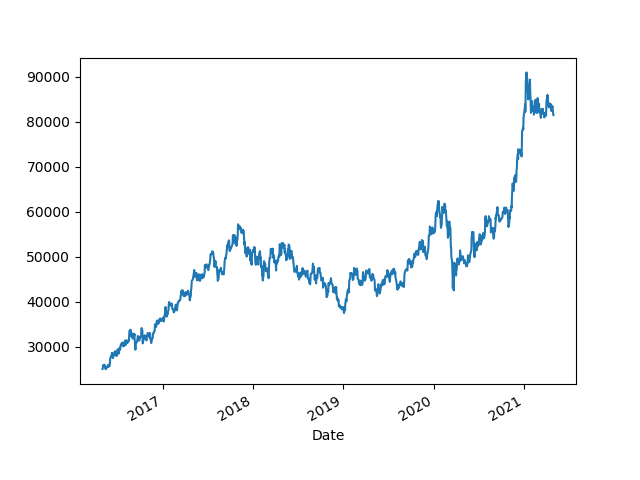

In [78]:
plt.figure()
df['Close'].plot()

<IPython.core.display.Javascript object>


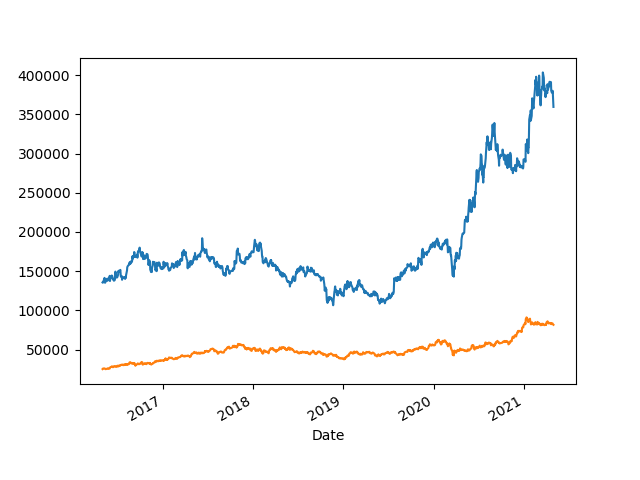

In [81]:
df2 = pdr.get_data_yahoo('035420.KS')
plt.figure()
df2['Close'].plot()
df['Close'].plot()